In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time
import tt

import functions as Boltzmann

In [1]:
class Params(object):
 
    def __init__(self):
        #fundamental constants
        self.Na = 6.02214129e+23
        self.kB = 1.381e-23 # J / K
        #gas parameters
        self.Mol = 40e-3 # kg / mol
        self.Rg = 8.3144598  / self.Mol  # J / (kg * K) 
        self.m = self.Mol / self.Na # kg
    
        self.Pr = 2. / 3.
        self.C = 144.4
        self.T_0 = 273.11
        self.mu_0 = 2.125e-05
    
        self.g = 5. / 3.
        
        self.d = 2 * 183e-12

p = Params()

L = 30
N = 30
vmax = 2000.

n_l = 2e+23 
u_l = 400.
T_l = 300.

M = u_l / ((p.g * p.Rg * T_l) ** .5)

n_r = (p.g + 1.) * M * M / ((p.g - 1.) * M * M + 2.) * n_l
u_r = ((p.g - 1.) * M * M + 2.) / ((p.g + 1.) * M * M) * u_l
T_r = (2. * p.g * M * M - (p.g - 1.)) * ((p.g - 1.) * M * M + 2.) / ((p.g + 1) ** 2 * M * M) * T_l

l = 1. / ((2 ** .5) * np.pi * n_l * p.d * p.d)

x_l = -20*l
x_r = 20*l

h = (x_r - x_l) / L

x = np.linspace(x_l+h/2, x_r-h/2, L) / l

#x_l = -20*l
#x_r = 20*l

Tau = 100

CFL = 0.5

print 'Max =', M

print 'n_l =', n_l, 'n_r =', n_r
print 'u_l =', u_l, 'u_r =', u_r
print 'T_l =', T_l, 'T_r =', T_r

hv = 2. * vmax / N
vx_ = np.linspace(-vmax+hv/2, vmax-hv/2, N)
vx, vy, vz = np.meshgrid(vx_, vx_, vx_, indexing='ij')

M_l = Boltzmann.F_m(vx-u_l, vy, vz, T_l, n_l, p)
M_r = Boltzmann.F_m(vx-u_r, vy, vz, T_r, n_r, p)


print 'Dens'
print (Boltzmann.J(M_l, vx, vy, vz, hv, N, p)[1] - n_l) / n_l
print (Boltzmann.J(M_r, vx, vy, vz, hv, N, p)[1] - n_r) / n_r

print 'Vel'
print (Boltzmann.J(M_l, vx, vy, vz, hv, N, p)[2] - u_l) / u_l
print (Boltzmann.J(M_r, vx, vy, vz, hv, N, p)[2] - u_r) / u_r

print 'Temp'
print (Boltzmann.J(M_l, vx, vy, vz, hv, N, p)[3] - T_l) / u_l
print (Boltzmann.J(M_r, vx, vy, vz, hv, N, p)[3] - T_r) / u_r



Max = 1.24076051934
n_l = 2e+23 n_r = 2.71305859803e+23
u_l = 400.0 u_r = 294.870151562
T_l = 300.0 T_r = 370.288721552
Dens
-4.6370882846720004e-11
-2.7884899333142083e-10
Vel
-1.935953264364798e-10
-1.6766527134545288e-09
Temp
-5.069658470802097e-10
-4.679876538538696e-09
time = 0 h 0 m 41 s
delta = 0.05488652703544402


In [ ]:
S = Boltzmann.solver(x_l = x_l, x_r = x_r, L = L, Tau = Tau, CFL = CFL, vmax = vmax,
           N = N, n_l = n_l, u_l = u_l, T_l = T_l, p = p, filename = 'file.txt')

delta = 0.05488652703544402


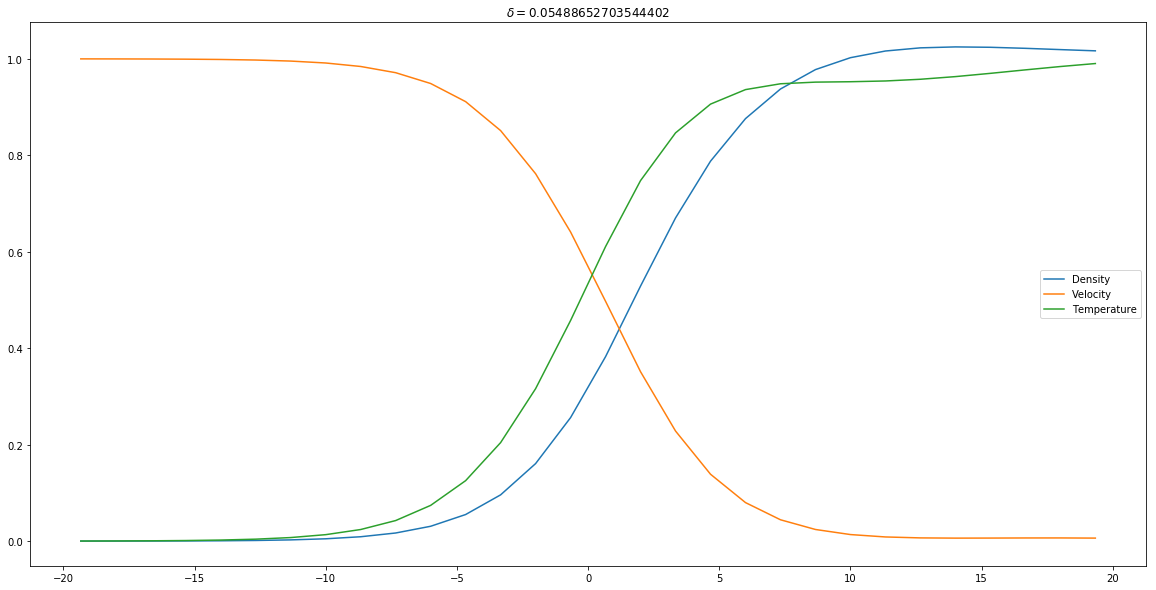

In [2]:
print 'delta =', S.delta
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(x, (S.Dens - n_l) / (n_r - n_l))
line.set_label('Density')
line, = ax.plot(x, (S.Vel - u_r) / (u_l - u_r))
line.set_label('Velocity')
line, = ax.plot(x, (S.Temp - T_l) / (T_r - T_l))
line.set_label('Temperature')
ax.legend()
ax.set(title='$\delta =$' + str(S.delta))
plt.savefig('profile.png')

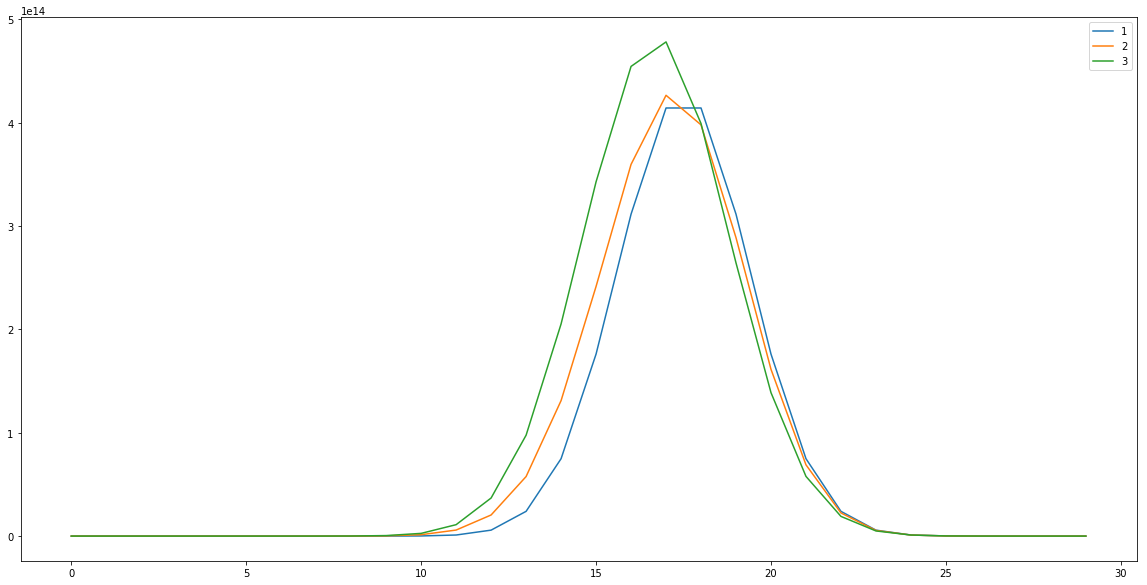

In [3]:
X1 = ((S.f[0]))[:, N/2+1, N/2+1]
X2 = ((S.f[L/2]))[:, N/2+1, N/2+1]
X3 = ((S.f[L-1]))[:, N/2+1, N/2+1]

fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(X1)#,'ko-')
line.set_label('1')
line, = ax.plot(X2)
line.set_label('2')
line, = ax.plot(X3)
line.set_label('3')
ax.legend()
plt.savefig('velo.png')

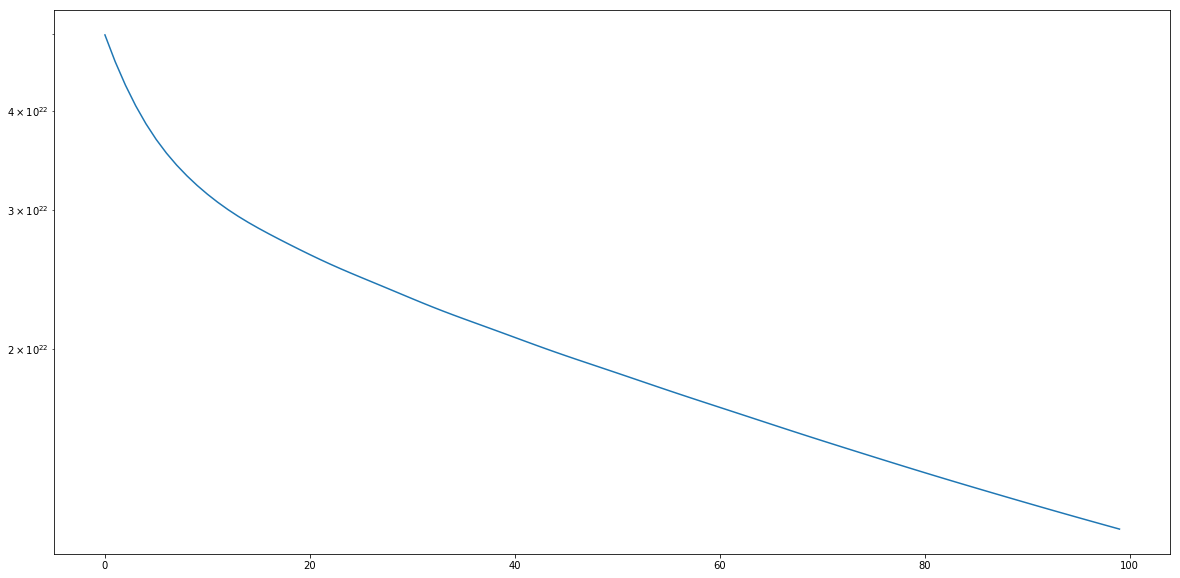

In [4]:
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.semilogy(S.Frob_norm_iter)
plt.savefig('norm_iter.png')

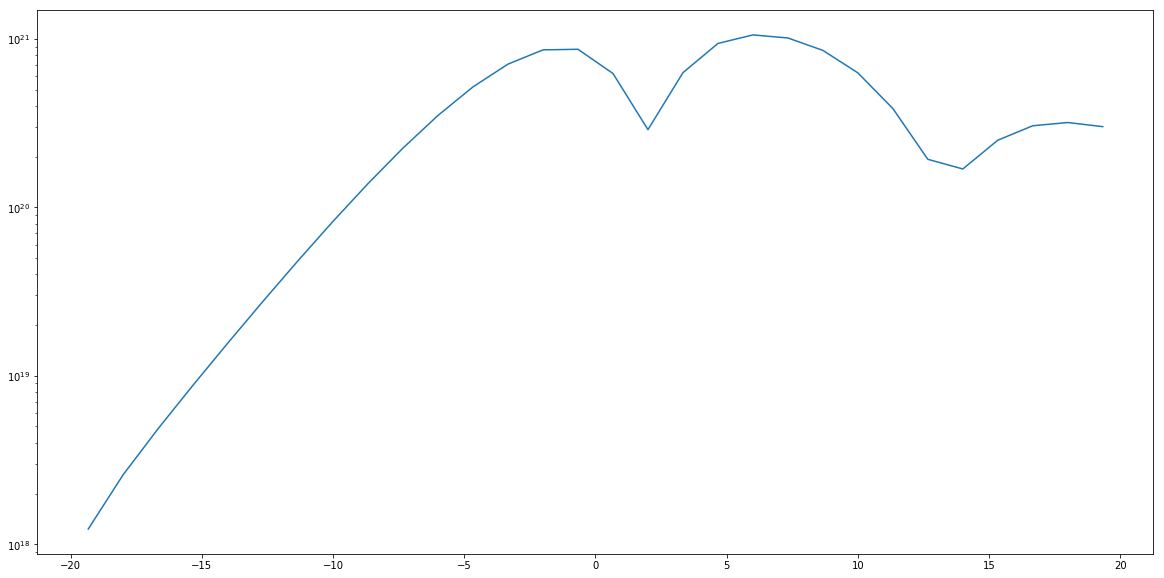

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.semilogy(x, S.Frob_norm_RHS)
plt.savefig('norm_rhs.png')